In [ ]:
### keras and tensorflow 2.0 

In [ ]:
# step - 1 we will collect the stock data -- AAPL

In [1]:
import pandas_datareader as pdr
key = '190a93234e0735f0b09d13e542689e22a639744d'

In [2]:
### reading data of apple stock market through tingo
df = pdr.get_data_tiingo('AAPL', api_key = key)

In [3]:
# saving all data to csv file
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-10-29 00:00:00+00:00,120.53,120.69,118.27,118.70,51227334,27.841853,27.878813,27.319804,27.419132,204909336,0.0,1.0
1,AAPL,2015-10-30 00:00:00+00:00,119.50,121.22,119.45,120.99,49365254,27.603928,28.001240,27.592378,27.948111,197461016,0.0,1.0
2,AAPL,2015-11-02 00:00:00+00:00,121.18,121.36,119.61,119.87,32203267,27.992000,28.033579,27.629338,27.689396,128813068,0.0,1.0
3,AAPL,2015-11-03 00:00:00+00:00,122.57,123.49,120.70,120.79,45518976,28.313084,28.525599,27.881122,27.901912,182075904,0.0,1.0
4,AAPL,2015-11-04 00:00:00+00:00,122.00,123.82,121.62,123.13,44886050,28.181416,28.601828,28.093638,28.442441,179544200,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-10-20 00:00:00+00:00,117.51,118.980,115.63,116.20,124423728,117.51,118.980,115.63,116.20,124423728,0.0,1.0
1253,AAPL,2020-10-21 00:00:00+00:00,116.87,118.705,116.45,116.67,89945980,116.87,118.705,116.45,116.67,89945980,0.0,1.0
1254,AAPL,2020-10-22 00:00:00+00:00,115.75,118.040,114.59,117.45,101987954,115.75,118.040,114.59,117.45,101987954,0.0,1.0
1255,AAPL,2020-10-23 00:00:00+00:00,115.04,116.550,114.28,116.39,82572645,115.04,116.550,114.28,116.39,82572645,0.0,1.0
1256,AAPL,2020-10-26 00:00:00+00:00,115.05,116.550,112.88,114.01,111850657,115.05,116.550,112.88,114.01,111850657,0.0,1.0


In [8]:
df1 = df.reset_index()['close']

In [9]:
# to see no. of rows
df1.shape

(1257,)

In [10]:
df1

0       120.53
1       119.50
2       121.18
3       122.57
4       122.00
         ...  
1252    117.51
1253    116.87
1254    115.75
1255    115.04
1256    115.05
Name: close, Length: 1257, dtype: float64

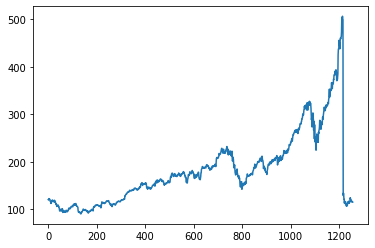

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
# LSTM are sensitive to the scale of the data. so we apply MinMax Scalar

In [13]:
import numpy as np

In [14]:
# need to bring all close value in rang 0-1 to make it easy 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1.shape

(1257, 1)

In [16]:
print(df1)

[[0.07261575]
 [0.0701383 ]
 [0.07417919]
 ...
 [0.06111846]
 [0.0594107 ]
 [0.05943476]]


In [17]:
# step - 2 preprocess the data- Train and test

In [18]:
# splitting dataset into train and test split
# 65% of total data is taken as training data and
# other 35% as test data
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(817, 440)

In [20]:
train_data

array([[0.07261575],
       [0.0701383 ],
       [0.07417919],
       [0.07752255],
       [0.07615153],
       [0.07355382],
       [0.07389056],
       [0.07271197],
       [0.06357186],
       [0.06198437],
       [0.0610463 ],
       [0.05291642],
       [0.05733013],
       [0.05616356],
       [0.06482261],
       [0.06840649],
       [0.06965725],
       [0.06592904],
       [0.06864702],
       [0.06660253],
       [0.06607336],
       [0.06725195],
       [0.06494287],
       [0.06239327],
       [0.05979555],
       [0.06900782],
       [0.06720385],
       [0.06708358],
       [0.06080577],
       [0.06212868],
       [0.05493686],
       [0.05325316],
       [0.04846663],
       [0.05051112],
       [0.04483464],
       [0.03773903],
       [0.0408659 ],
       [0.04062538],
       [0.04394468],
       [0.04254961],
       [0.03963921],
       [0.04425737],
       [0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.014

In [21]:
import numpy
#data preprocessing
#convert an array of values into dataset matrix refer attached txt file
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [],[]
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [22]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [23]:
print(x_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [24]:
print(x_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for lstm
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [27]:
print(x_train.shape), print(y_train.shape)

(716, 100, 1)
(716,)


(None, None)

In [30]:
# create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 248ms/step - loss: 0.0049 - val_loss: 0.0426
Epoch 2/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0011 - val_loss: 0.0249
Epoch 3/100
12/12 [==============================] - 2s 169ms/step - loss: 6.0431e-04 - val_loss: 0.0209
Epoch 4/100
12/12 [==============================] - 2s 171ms/step - loss: 3.9006e-04 - val_loss: 0.0199
Epoch 5/100
12/12 [==============================] - 2s 173ms/step - loss: 3.4263e-04 - val_loss: 0.0193
Epoch 6/100
12/12 [==============================] - 2s 173ms/step - loss: 3.3166e-04 - val_loss: 0.0187
Epoch 7/100
12/12 [==============================] - 2s 177ms/step - loss: 3.4013e-04 - val_loss: 0.0181
Epoch 8/100
12/12 [==============================] - 2s 171ms/step - loss: 3.1661e-04 - val_loss: 0.0177
Epoch 9/100
12/12 [==============================] - 2s 170ms/step - loss: 2.9602e-04 - val_loss: 0.0169
Epoch 10/100
12/12 [==============================] - 2s 173ms/

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.3.0'

In [38]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [39]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

154.93813427226587

In [42]:
math.sqrt(mean_squared_error(y_test,test_predict))

272.8839933382061

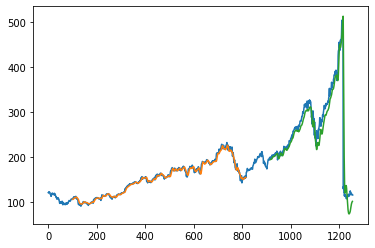

In [44]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [46]:
len(test_data)

440

In [47]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [49]:
temp_input

[0.5800601322910404,
 0.584774503908599,
 0.6101022248947685,
 0.6313890559230306,
 0.5906434155141311,
 0.5976187612748045,
 0.607696933253157,
 0.6295610342754059,
 0.6283824413710162,
 0.628719182200842,
 0.6238845460012028,
 0.6458929645219482,
 0.6643174984966926,
 0.6487552615754661,
 0.6602525556223691,
 0.6332892363199039,
 0.6528923631990378,
 0.6601563439567049,
 0.6584966927239928,
 0.6584966927239928,
 0.6819242333132893,
 0.6791340950090199,
 0.7000120264582081,
 0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961

In [50]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.02930396]
101
1 day input [0.5847745  0.61010222 0.63138906 0.59064342 0.59761876 0.60769693
 0.62956103 0.62838244 0.62871918 0.62388455 0.64589296 0.6643175
 0.64875526 0.66025256 0.63328924 0.65289236 0.66015634 0.65849669
 0.65849669 0.68192423 0.6791341  0.70001203 0.7039567  0.70556825
 0.70131088 0.71651233 0.72293446 0.711365   0.70948888 0.72901984
 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876 0.67990379
 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118 0.8416356
 0.87858088 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632
 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044
 0.99360192 0.98366807 1.         0.98544799 0.9834997  0.09308479
 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477
 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113  0.04810583
 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721
 0.05921828 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243
 0.05488876 0.05950692 0.05924233 0.

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [52]:
import matplotlib.pyplot as plt

In [53]:
len(df1)

1257

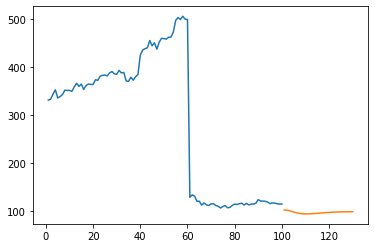

In [55]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

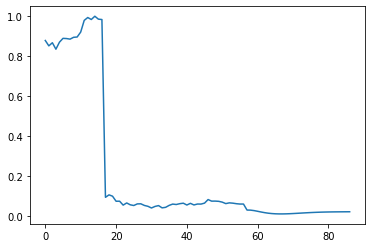

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [57]:
df3=scaler.inverse_transform(df3).tolist()

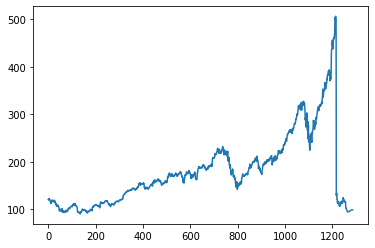

In [58]:
plt.plot(df3)